# Chargement des packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
sns.set_theme()

from datetime import datetime, timedelta

from sklearn.linear_model import LinearRegression

# **importation et lecture des fichiers**

In [3]:
private_data = pd.read_csv('private_data.csv')

In [4]:
final_stamp = pd.read_csv('final_stamp.csv')

In [5]:
private_data.head()

,Unnamed: 0,quantity,order_count,average_retail_price,average_selling_price,marketplace,seller_id,product_id,variation_id,date
0,0,1,1,620000.0,559000.0,LAZ,0,0,0,2019-01-01
1,1,1,1,620000.0,559000.0,LAZ,0,0,0,2019-01-04
2,2,3,3,620000.0,559000.0,LAZ,0,0,0,2019-01-05
3,3,1,1,620000.0,509000.0,LAZ,0,0,0,2019-01-09
4,4,2,2,620000.0,559000.0,LAZ,0,0,0,2019-01-13


In [6]:
final_stamp.head()

,Unnamed: 0,historical_sales,rating_1,rating_2,rating_4,rating_5,rating_avg,rating_count,retail_price,review_count,selling_price,stamp,stock,marketplace,seller_id,product_id,variation_id
0,0,NaN,8.0,3.0,12.0,191.0,4.7,221.0,605000,62.0,569000,2020-10-25 14:00:00+00:00,151,LAZ,0,10,10
1,1,NaN,0.0,1.0,5.0,114.0,4.8,126.0,620000,44.0,499000,2020-10-25 14:00:00+00:00,8,LAZ,0,0,0
2,2,NaN,7.0,5.0,26.0,597.0,4.9,646.0,542000,187.0,359000,2020-10-25 14:00:00+00:00,48,LAZ,0,64,64
3,3,NaN,0.0,0.0,3.0,48.0,4.9,53.0,1198000,16.0,629000,2020-10-25 14:00:00+00:00,193,LAZ,0,211,211
4,4,NaN,1.0,0.0,0.0,35.0,4.9,36.0,550000,4.0,539000,2020-10-25 14:00:00+00:00,174,LAZ,0,219,219


In [7]:
print('dimensions private_data:', private_data.shape[0], 'lignes et', private_data.shape[1], 'colonnes')
print('dimensions final_stamp:', final_stamp.shape[0], 'lignes et', final_stamp.shape[1], 'colonnes')

dimensions private_data: 155267 lignes et 10 colonnes
dimensions final_stamp: 408527 lignes et 17 colonnes


# Questions et remarques concernant l'exploration des données

In [ ]:
#graphique : distribution des order count en fonction des produits
#graphique : distribution des order count en fonction du prix
#graphique : distribution des notes en fonction des produits
#graphique : distribution des order count en fonction de la marketplace
#graphique : distribution des order en fonction de la periode: annees/trimestre/mois/jour
# graphique : affichage des top 10 articles vendus
#graphique : distribution des ventes par rapport a la variation_id
#graphique: peut etre interessant d'analyser les Na par ex: est ce que il ya un lien entre le fait qu'il n' yait pas d'avis et le prix ou entre le fait qu'il n 'yait pas d'avis et le vendeur ou la marketplace(peut etre le vendeur ne relance pas les clients pr avoir les avis)
#analyse statistique:
#Test anova entre relation du nombre de commande et la date(mois ou annee ou trimestre)
#test de anova entre nombre de commande et marketplace
#test de pearson entre nomre de commande et prix de vente
#test de pearson entre stock et nombre de commande (peut etre si il nya pas de stock pas de commande)

In [ ]:
#Questions : 
#quel période (mois de l’année) le meilleur chiffre d’affaire a été réalisé ? 
#sur quel site le maximum de commandes a été enrégistré 
#à quel moment les promotions publicitaires sont ils nécessaires pour réaliser plus de ventes? 
#quel produit se vend le plus ? y a-t-il une raison ? 
#quel produit se vend le moins ? y a-t-il une raison ? 
#valeur cible : quantité de produits vendus?

# exploration des données du tableau private_data

In [ ]:
# types des variables:
private_data.info()

# pas de valeurs manquantes
# la variable 'date' n'est pas au bon format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155267 entries, 0 to 155266
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             155267 non-null  int64  
 1   quantity               155267 non-null  int64  
 2   order_count            155267 non-null  int64  
 3   average_retail_price   155267 non-null  float64
 4   average_selling_price  155267 non-null  float64
 5   marketplace            155267 non-null  object 
 6   seller_id              155267 non-null  int64  
 7   product_id             155267 non-null  int64  
 8   variation_id           155267 non-null  int64  
 9   date                   155267 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 11.8+ MB


In [8]:
# transformation de la variable 'date' en format date et séparation de cette variable en année, mois, jours et weekend

private_data['date'] = pd.to_datetime(private_data['date'])
private_data['year'] = private_data['date'].dt.year
private_data['month'] = private_data['date'].dt.month
private_data['weekday'] = private_data['date'].dt.weekday
private_data['weekend'] = np.where((private_data['weekday'] == 5) | (private_data['weekday'] == 6), 1, 0)

# suppression de la variable Unnamed:0 (car identique à la colonne index)
private_data = private_data.drop('Unnamed: 0', axis = 1)

In [9]:
# années de collecte de données du tableau private_data: données collectés entre 2019 et 2020
private_data['year'].unique()

array([2019, 2020], dtype=int64)

In [10]:
# vérification des doublons: pas de doublons dans le tableau private_data
private_data.duplicated().sum()

0

In [11]:
print("les marketplace sont", private_data['marketplace'].unique())
print("les id des vendeurs vont de", private_data['seller_id'].unique())

les marketplace sont ['LAZ' 'SHP']
les id des vendeurs vont de [ 0  1  2  3  4  5  6  7  8  9 10]


In [12]:
# nettoyage des données du tableau private_data
private_data_1 = private_data[(private_data['average_retail_price'] == 0) & (private_data['average_selling_price'] == 0)]

# supprimer les valeurs où les selling_price et retail_price sont nuls: Ces lignes sont sûrement un bug du système
private_data = private_data[(private_data['average_retail_price'] != 0) & (private_data['average_selling_price'] != 0)]


In [13]:
print((private_data['average_retail_price'] == 0).sum())
print((private_data['average_selling_price'] == 0).sum())

0
0


In [14]:
# nombre de produits vendus: 2293
private_data['variation_id'].astype('str').describe()

# le top produit de la colonne variation_id = 1878, sa fréquence est de 44103 fois. Est-ce le produit le plus vendu? le plus visité? le plus commenté?

count     148184
unique      2293
top         1878
freq       44103
Name: variation_id, dtype: object

In [15]:
# nombres de catégories de produits vendus: 1924
private_data['product_id'].astype('str').describe()

# le top produit de la colonne product_id = 2084, il apparaît 2874. Est-ce le produit le plus vendu? le plus visité? le plus commenté?

count     148184
unique      1924
top         2084
freq        2874
Name: product_id, dtype: object

# exploration des données du tableau final_stamp

In [ ]:
# types des variables:
final_stamp.info()

# la variable 'date' n'est pas au bon format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408527 entries, 0 to 408526
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        408527 non-null  int64  
 1   historical_sales  132263 non-null  float64
 2   rating_1          118034 non-null  float64
 3   rating_2          118034 non-null  float64
 4   rating_4          118034 non-null  float64
 5   rating_5          118034 non-null  float64
 6   rating_avg        216692 non-null  float64
 7   rating_count      118034 non-null  float64
 8   retail_price      408527 non-null  int64  
 9   review_count      216692 non-null  float64
 10  selling_price     408527 non-null  int64  
 11  stamp             408527 non-null  object 
 12  stock             408527 non-null  int64  
 13  marketplace       408527 non-null  object 
 14  seller_id         408527 non-null  int64  
 15  product_id        408527 non-null  int64  
 16  variation_id      40

In [16]:
# transformation de la variable 'date' en format date et séparation de cette variable en année, mois, jours

final_stamp['stamp'] = pd.to_datetime(final_stamp['stamp'])
final_stamp['stamp_year'] = final_stamp['stamp'].dt.year
final_stamp['stamp_month'] = final_stamp['stamp'].dt.month
final_stamp['stamp_weekday'] = final_stamp['stamp'].dt.weekday

In [17]:
# suppression de la variable Unnamed:0 (car identique à la colonne index)
final_stamp = final_stamp.drop('Unnamed: 0', axis = 1)

In [18]:
# années de collecte de données du tableau final_stamp = 2020, tandis que dans private_data les années sont 2019 et 2020
final_stamp['stamp_year'].unique()

array([2020], dtype=int64)

In [19]:
print("les marketplace sont", final_stamp['marketplace'].unique())
print("les id des vendeurs vont de", final_stamp['seller_id'].unique())
# marketplace et seller_id identiques dans les deux tableaux

les marketplace sont ['LAZ' 'SHP']
les id des vendeurs vont de [ 0  2  5  3  6  1  4 10  9  7  8]


# Analyse valeurs manquantes

In [ ]:
# évaluation des valeurs manquantes:
final_stamp.isna().sum().sort_values(ascending = False)/final_stamp.shape[0]

# forte proportion de valeurs manquantes (plus de 70%) des colonnes rating_* et rating_count: pourquoi?

rating_2            0.711074
rating_4            0.711074
rating_5            0.711074
rating_count        0.711074
rating_1            0.711074
historical_sales    0.676244
rating_avg          0.469577
review_count        0.469577
seller_id           0.000000
stamp_month         0.000000
stamp_year          0.000000
variation_id        0.000000
product_id          0.000000
selling_price       0.000000
marketplace         0.000000
stock               0.000000
stamp               0.000000
retail_price        0.000000
stamp_weekday       0.000000
dtype: float64

In [ ]:
# valeurs manquantes de la colonne 'review_count':
review_nan = pd.isnull(final_stamp['review_count'])
stamp_review_nan = final_stamp[review_nan]
stamp_review_nan

,historical_sales,rating_1,rating_2,rating_4,rating_5,rating_avg,rating_count,retail_price,review_count,selling_price,stamp,stock,marketplace,seller_id,product_id,variation_id,stamp_year,stamp_month,stamp_weekday
38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,288003,NaN,0,2020-10-25 17:00:00+00:00,0,LAZ,2,454,456,2020,10,6
39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,288002,NaN,0,2020-10-25 17:00:00+00:00,0,LAZ,2,454,455,2020,10,6
84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,215000,NaN,0,2020-10-25 17:00:00+00:00,0,LAZ,2,465,512,2020,10,6
92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,215000,NaN,0,2020-10-25 17:00:00+00:00,0,LAZ,2,465,510,2020,10,6
93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,215000,NaN,0,2020-10-25 17:00:00+00:00,0,LAZ,2,465,509,2020,10,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,215000,NaN,0,2020-10-25 17:00:00+00:00,0,LAZ,2,465,504,2020,10,6
408523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,198000,NaN,178000,2020-10-25 17:00:00+00:00,0,LAZ,3,627,883,2020,10,6
408524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135000,NaN,0,2020-10-25 17:00:00+00:00,0,LAZ,2,464,501,2020,10,6
408525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,278000,NaN,0,2020-10-25 17:00:00+00:00,0,LAZ,3,598,851,2020,10,6


In [ ]:
stamp_review_nan['marketplace'].unique()

array(['LAZ'], dtype=object)

In [ ]:
(stamp_review_nan.isna().sum())/stamp_review_nan.shape[0]

historical_sales    1.0
rating_1            1.0
rating_2            1.0
rating_4            1.0
rating_5            1.0
rating_avg          1.0
rating_count        1.0
retail_price        0.0
review_count        1.0
selling_price       0.0
stamp               0.0
stock               0.0
marketplace         0.0
seller_id           0.0
product_id          0.0
variation_id        0.0
stamp_year          0.0
stamp_month         0.0
stamp_weekday       0.0
dtype: float64

In [ ]:
# 100% des valeurs manquantes de la colonne review_count ne concerne que le site de vente 'LAZ'.
# on remarque également que lorsque la valeur de la colonne review_count est manquante, 100% des colonnes rating_*, rating_count et rating_avg le sont aussi.

# Du fait que le site de vente 'LAZ' n'ait pas d'historique de vente, on peut penser à une collecte de données mal faite (ou pas optimisée) sur ce site.

# Au vu des informations ci-dessus, les lignes de valeurs manquantes de la colonne review_count vont être supprimées pour la suite.

final_stamp = final_stamp.dropna(subset = ['review_count'])
final_stamp.isna().sum().sort_values(ascending = False)/final_stamp.shape[0]

rating_2            0.455291
rating_4            0.455291
rating_5            0.455291
rating_count        0.455291
rating_1            0.455291
historical_sales    0.389627
marketplace         0.000000
stamp_month         0.000000
stamp_year          0.000000
variation_id        0.000000
product_id          0.000000
seller_id           0.000000
selling_price       0.000000
stock               0.000000
stamp               0.000000
review_count        0.000000
retail_price        0.000000
rating_avg          0.000000
stamp_weekday       0.000000
dtype: float64

In [ ]:
# Analyse des situations où retail_price  et selling_price sont nuls en même temps:
final_stamp_0 = final_stamp[(final_stamp['retail_price'] == 0) & (final_stamp['selling_price'] == 0)]

In [ ]:
final_stamp_0

,historical_sales,rating_1,rating_2,rating_4,rating_5,rating_avg,rating_count,retail_price,review_count,selling_price,stamp,stock,marketplace,seller_id,product_id,variation_id,stamp_year,stamp_month,stamp_weekday
10268,120.0,NaN,NaN,NaN,NaN,4.968750,NaN,0,32.0,0,2020-04-21 14:00:00+00:00,0,SHP,7,1511,1878,2020,4,1
10269,300.0,NaN,NaN,NaN,NaN,4.846715,NaN,0,136.0,0,2020-04-21 14:00:00+00:00,0,SHP,7,1362,1878,2020,4,1
10270,13.0,NaN,NaN,NaN,NaN,5.000000,NaN,0,2.0,0,2020-04-21 14:00:00+00:00,0,SHP,7,1512,1878,2020,4,1
10271,780.0,NaN,NaN,NaN,NaN,4.954407,NaN,0,329.0,0,2020-04-21 14:00:00+00:00,0,SHP,7,1378,1878,2020,4,1
10272,949.0,NaN,NaN,NaN,NaN,4.915094,NaN,0,424.0,0,2020-04-21 14:00:00+00:00,0,SHP,7,1374,1878,2020,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328834,1.0,NaN,NaN,NaN,NaN,5.000000,NaN,0,1.0,0,2020-09-17 17:00:00+00:00,0,SHP,10,2102,1878,2020,9,3
328835,55.0,NaN,NaN,NaN,NaN,4.956522,NaN,0,23.0,0,2020-09-17 17:00:00+00:00,228,SHP,10,2163,1878,2020,9,3
328836,171.0,NaN,NaN,NaN,NaN,4.880952,NaN,0,84.0,0,2020-09-17 17:00:00+00:00,161,SHP,10,2150,1878,2020,9,3
328837,162.0,NaN,NaN,NaN,NaN,4.986486,NaN,0,74.0,0,2020-09-17 17:00:00+00:00,81,SHP,10,2117,1878,2020,9,3


In [ ]:
final_stamp_0['marketplace'].unique()

array(['SHP'], dtype=object)

In [ ]:
final_stamp_0.isna().sum().sort_values(ascending = False)/final_stamp_0.shape[0]

rating_2            1.0
rating_4            1.0
rating_5            1.0
rating_count        1.0
rating_1            1.0
historical_sales    0.0
marketplace         0.0
stamp_month         0.0
stamp_year          0.0
variation_id        0.0
product_id          0.0
seller_id           0.0
selling_price       0.0
stock               0.0
stamp               0.0
review_count        0.0
retail_price        0.0
rating_avg          0.0
stamp_weekday       0.0
dtype: float64

In [ ]:

# uniquement le site de vente 'SHP' est concerné lorsque ces deux colonnes sont nulles simultanément: sûrement un bug du système lors de l'enregistrement des données
# on remarque ci-dessus que pour retail_price = 0 et selling_price = 0, les colonnes rating_* et rating_count ont 100% des valeurs manquantes. 
# Décision de supprimer les lignes où selling_price et retail_price == 0 (même traitement que celui fait dans le tableau private_data plus haut)

 # sélection des lignes où selling_price et retail_price sont différents de 0:
final_stamp = final_stamp[(final_stamp['retail_price'] != 0) & (final_stamp['selling_price'] != 0)]

In [ ]:
final_stamp.isna().sum().sort_values(ascending = False)/final_stamp.shape[0]

historical_sales    0.806016
stamp               0.000000
stamp_month         0.000000
stamp_year          0.000000
variation_id        0.000000
product_id          0.000000
seller_id           0.000000
marketplace         0.000000
stock               0.000000
selling_price       0.000000
rating_1            0.000000
review_count        0.000000
retail_price        0.000000
rating_count        0.000000
rating_avg          0.000000
rating_5            0.000000
rating_4            0.000000
rating_2            0.000000
stamp_weekday       0.000000
dtype: float64

In [20]:
# nouveau calcul des valeurs manquantes
final_stamp.isna().sum().sort_values(ascending = False)/final_stamp.shape[0]

rating_2            0.711074
rating_4            0.711074
rating_5            0.711074
rating_count        0.711074
rating_1            0.711074
historical_sales    0.676244
rating_avg          0.469577
review_count        0.469577
seller_id           0.000000
stamp_month         0.000000
stamp_year          0.000000
variation_id        0.000000
product_id          0.000000
selling_price       0.000000
marketplace         0.000000
stock               0.000000
stamp               0.000000
retail_price        0.000000
stamp_weekday       0.000000
dtype: float64

In [ ]:
# vérification des doublons
final_stamp.duplicated().sum()

221

In [ ]:
final_stamp[final_stamp.duplicated(keep=False)].head(10)

,rating_1,rating_2,rating_4,rating_5,rating_avg,rating_count,retail_price,review_count,selling_price,stamp,stock,marketplace,seller_id,product_id,variation_id,stamp_year,stamp_month,stamp_weekday
2400,0.0,0.0,0.0,12.0,5.0,12.0,288000,6.0,244000,2020-10-26 04:00:00+00:00,41,LAZ,2,550,742,2020,10,0
2401,0.0,0.0,0.0,12.0,5.0,12.0,288000,6.0,244000,2020-10-26 04:00:00+00:00,41,LAZ,2,550,742,2020,10,0
2419,2.0,0.0,2.0,58.0,4.8,62.0,790000,31.0,790000,2020-10-26 04:00:00+00:00,10,LAZ,6,1276,1769,2020,10,0
2576,2.0,0.0,2.0,58.0,4.8,62.0,790000,31.0,790000,2020-10-26 04:00:00+00:00,8,LAZ,6,1276,1767,2020,10,0
2577,2.0,0.0,2.0,58.0,4.8,62.0,790000,31.0,790000,2020-10-26 04:00:00+00:00,8,LAZ,6,1276,1767,2020,10,0
2578,2.0,0.0,2.0,58.0,4.8,62.0,790000,31.0,790000,2020-10-26 04:00:00+00:00,12,LAZ,6,1276,1766,2020,10,0
2579,2.0,0.0,2.0,58.0,4.8,62.0,790000,31.0,790000,2020-10-26 04:00:00+00:00,12,LAZ,6,1276,1766,2020,10,0
2580,2.0,0.0,2.0,58.0,4.8,62.0,790000,31.0,790000,2020-10-26 04:00:00+00:00,10,LAZ,6,1276,1769,2020,10,0
2895,10.0,6.0,26.0,292.0,4.7,343.0,178000,91.0,160000,2020-10-26 04:00:00+00:00,20,LAZ,2,489,584,2020,10,0
2899,10.0,6.0,26.0,292.0,4.7,343.0,178000,91.0,160000,2020-10-26 04:00:00+00:00,20,LAZ,2,489,584,2020,10,0


In [ ]:
# Décision de garder que la première ligne de chaque doublon:
final_stamp = final_stamp.drop_duplicates(keep = 'first')

In [ ]:
final_stamp.duplicated().sum()
# doublons supprimés

0

In [ ]:
# nombres de catégories de produits notés: 1096 contre 1924 vendus (cf tableau private_data)
final_stamp['product_id'].astype('str').describe()

count     104334
unique      1096
top          715
freq        2781
Name: product_id, dtype: object

In [ ]:
# nombre de produits notés: 1464 contre 2293 produits vendus
# à noter également que le top produit de la colonne 'variation_id' dans final_stamp est également le top dans private_data (1878): reste à voir s'il est le plus vendu? le plus commenté? le plus noté?
final_stamp['variation_id'].astype('str').describe()

count     104334
unique      1464
top         1878
freq        2644
Name: variation_id, dtype: object

# Nettoyage des données et mise en forme des variables dans les deux tableaux

In [ ]:
final_stamp.describe()

,rating_1,rating_2,rating_4,rating_5,rating_avg,rating_count,retail_price,review_count,selling_price,stock,seller_id,product_id,variation_id,stamp_year,stamp_month,stamp_weekday
count,104334.000000,104334.000000,104334.000000,104334.000000,104334.000000,104334.000000,1.043340e+05,104334.000000,1.043340e+05,104334.000000,104334.000000,104334.000000,104334.000000,104334.0,104334.000000,104334.000000
mean,20.133466,11.175753,54.135814,1085.246909,4.403734,1194.849244,6.395537e+05,449.044089,5.905885e+05,104.229187,4.232743,943.172139,1183.168085,2020.0,8.511051,3.170299
std,45.068858,22.290449,128.704215,3716.921845,1.307333,3935.450678,7.509879e+05,1553.631160,7.490586e+05,396.118146,3.015535,602.294017,686.816652,0.0,1.334720,1.891364
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.022000e+04,0.000000,1.000000e+03,0.000000,0.000000,0.000000,0.000000,2020.0,4.000000,0.000000
25%,0.000000,0.000000,0.000000,10.000000,4.700000,11.000000,2.000000e+05,4.000000,1.680000e+05,9.000000,2.000000,507.000000,640.000000,2020.0,8.000000,2.000000
50%,2.000000,1.000000,6.000000,100.000000,4.800000,112.000000,2.880000e+05,39.000000,2.580000e+05,35.000000,3.000000,800.000000,1165.000000,2020.0,9.000000,3.000000
75%,17.000000,10.000000,49.000000,745.000000,4.900000,825.750000,8.500000e+05,268.000000,7.900000e+05,87.000000,6.000000,1239.000000,1695.000000,2020.0,10.000000,5.000000
max,467.000000,200.000000,1691.000000,63211.000000,5.000000,66173.000000,8.200000e+06,48905.000000,8.200000e+06,14153.000000,10.000000,2184.000000,2548.000000,2020.0,10.000000,6.000000


In [ ]:
# dans le tableau final_stamp il y a des lignes avec un rating_count = 0. 
final_stamp_2 = final_stamp[final_stamp["rating_count"] == 0]
print (final_stamp_2['rating_1'].unique())
print (final_stamp_2['rating_2'].unique())
print (final_stamp_2['rating_4'].unique())
print (final_stamp_2['rating_5'].unique())
print (final_stamp_2['rating_avg'].unique())
print (final_stamp_2['review_count'].unique())

final_stamp_2

[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


,rating_1,rating_2,rating_4,rating_5,rating_avg,rating_count,retail_price,review_count,selling_price,stamp,stock,marketplace,seller_id,product_id,variation_id,stamp_year,stamp_month,stamp_weekday
379,0.0,0.0,0.0,0.0,0.0,0.0,980000,0.0,980000,2020-10-25 14:00:00+00:00,6,LAZ,6,1249,1710,2020,10,6
380,0.0,0.0,0.0,0.0,0.0,0.0,980000,0.0,980000,2020-10-25 14:00:00+00:00,4,LAZ,6,1249,1709,2020,10,6
381,0.0,0.0,0.0,0.0,0.0,0.0,1350000,0.0,1350000,2020-10-25 14:00:00+00:00,4,LAZ,6,1248,1707,2020,10,6
382,0.0,0.0,0.0,0.0,0.0,0.0,1350000,0.0,1350000,2020-10-25 14:00:00+00:00,5,LAZ,6,1248,1708,2020,10,6
383,0.0,0.0,0.0,0.0,0.0,0.0,1350000,0.0,1350000,2020-10-25 14:00:00+00:00,4,LAZ,6,1248,1706,2020,10,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407861,0.0,0.0,0.0,0.0,0.0,0.0,1000000,0.0,1000000,2020-10-25 07:00:00+00:00,5,LAZ,5,1062,1459,2020,10,6
408440,0.0,0.0,0.0,0.0,0.0,0.0,2650000,0.0,2650000,2020-10-25 13:00:00+00:00,2,LAZ,4,989,1366,2020,10,6
408451,0.0,0.0,0.0,0.0,0.0,0.0,760000,0.0,760000,2020-10-25 13:00:00+00:00,6,LAZ,4,1030,1407,2020,10,6
408454,0.0,0.0,0.0,0.0,0.0,0.0,1000000,0.0,1000000,2020-10-25 13:00:00+00:00,1,LAZ,4,1032,1409,2020,10,6


In [ ]:
# Décision de supprimer ces lignes car tous les rating_* concernés sont également = 0
final_stamp = final_stamp[final_stamp["rating_count"] != 0]

# Décision également de supprimer les colonnes rating_* (avec * = 1, 2, 4, 5): les variables rating_avg et rating_count résume assez bien l'ensemble des notes attribuées
final_stamp = final_stamp.drop(['rating_1', 'rating_2', 
                                'rating_4', 'rating_5'], axis = 1)

In [ ]:
# suppression également des colonnes ['stamp', 'stamp_year', 'stamp_month', 'stamp_weekday']: pas besoin pour la fusion des deux tableaux
final_stamp = final_stamp.drop(['stamp', 'stamp_year', 'stamp_month', 'stamp_weekday'], axis = 1)

In [ ]:
# rename des colonnes retail_price et selling_price en average_selling_price et average_retail_price respectivement
final_stamp = final_stamp.rename(columns={'selling_price': 'average_selling_price', 'retail_price': 'average_retail_price'})
final_stamp

,rating_avg,rating_count,average_retail_price,review_count,average_selling_price,stock,marketplace,seller_id,product_id,variation_id
0,4.7,221.0,605000,62.0,569000,151,LAZ,0,10,10
1,4.8,126.0,620000,44.0,499000,8,LAZ,0,0,0
2,4.9,646.0,542000,187.0,359000,48,LAZ,0,64,64
3,4.9,53.0,1198000,16.0,629000,193,LAZ,0,211,211
4,4.9,36.0,550000,4.0,539000,174,LAZ,0,219,219
...,...,...,...,...,...,...,...,...,...,...
408501,4.3,6.0,1500000,2.0,1500000,117,LAZ,4,983,1360
408503,4.9,100.0,1080000,38.0,1080000,166,LAZ,4,943,1320
408504,4.9,56.0,1880000,23.0,1880000,71,LAZ,4,967,1344
408505,5.0,2.0,680000,1.0,680000,0,LAZ,4,953,1330


In [ ]:
# tableau private_data: mettre les colonnes de type float en integer (pour la cohérence entre les deux tableaux)
private_data[["average_retail_price", "average_selling_price"]] = private_data[["average_retail_price", "average_selling_price"]].astype(int)

# tableau private_data: création d'une nouvelle colonne tot_selling_price: qui indique le prix total de chaque transaction
private_data['tot_selling_price'] = private_data['quantity']*private_data['average_selling_price']

In [ ]:
# pour que les deux tableaux soient cohérents en terme d'affichage des données: il faudrait dans le tableau final_stamp,
# mettre les colonnes marketplace, seller_id, product_id et variation id par ordre croissant

final_stamp = final_stamp.sort_values(by = ['marketplace', 'seller_id', 'product_id', 'variation_id', 'average_retail_price', 'average_selling_price'])
private_data = private_data.sort_values(by = ['marketplace', 'seller_id', 'product_id', 'variation_id', 'average_retail_price', 'average_selling_price'])

# suppression de la colonne 'date'
#private_data = private_data.drop('date', axis = 1)

# Correlations entre variables

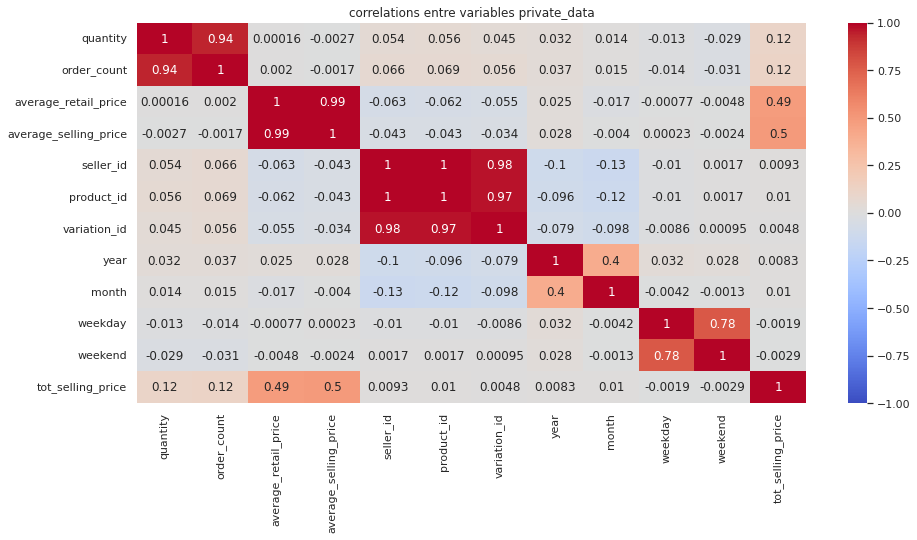

In [ ]:
# tableau de correlation private_data
correlations = private_data.corr()
plt.figure(figsize = (15,7))
plt.title("correlations entre variables private_data")
sns.heatmap(correlations, vmin = -1, vmax = 1, annot = True, cmap = 'coolwarm');

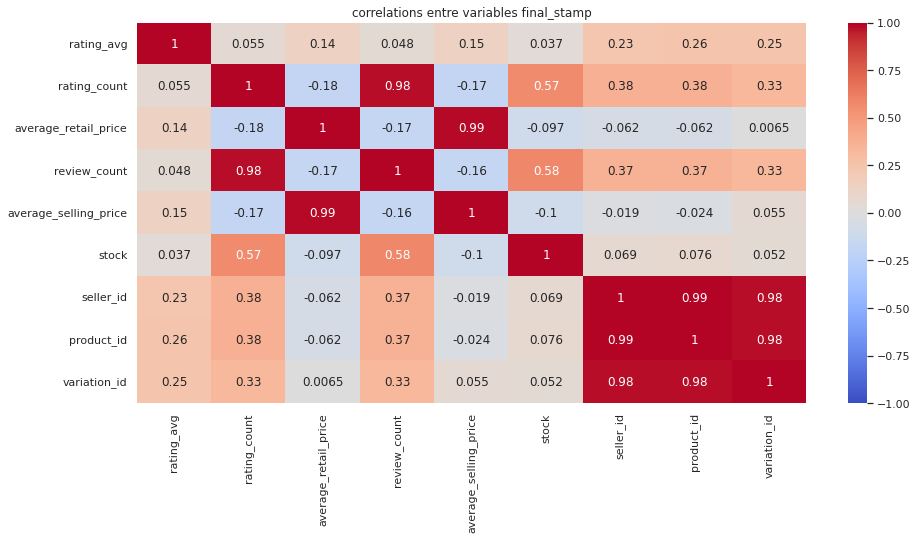

In [ ]:
correlations = final_stamp.corr()
plt.figure(figsize = (15,7))
plt.title("correlations entre variables final_stamp")
sns.heatmap(correlations, vmin = -1, vmax = 1, annot = True, cmap = 'coolwarm');

# Exploration graphique

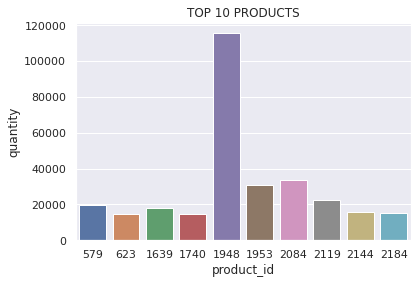

,quantity,order_count,average_retail_price,average_selling_price,seller_id,variation_id,year,month,weekday,weekend,tot_selling_price
product_id,,,,,,,,,,,
1948,115554,97673,129038310,95681117,8406,1963268,1886503,4078,2775,259,9455010848
2084,33805,32425,476262508,365256484,28740,6838732,5805480,16166,8521,812,4164763084
1953,30637,28041,145308848,112539182,10503,2457166,2357133,5192,3450,321,2455839329
2119,22481,20309,35517599,28328269,3100,582180,626140,1360,920,86,1785059991
579,19862,10435,50833853,38843924,990,274230,666554,1711,983,92,1908399758
1639,17998,17530,102328331,75844450,2056,482646,519140,1251,772,74,4811181316
2144,15754,15014,41558739,33195116,3110,584058,628160,1365,920,86,1455280566
2184,15274,14680,241145100,186837093,14230,3622942,2874180,6184,4209,393,1881966827
623,14862,10234,47265057,36736633,987,289191,664533,1715,991,94,1433957798


In [ ]:

#TOP 10 PRODUITS

df_group_by=private_data.groupby(by=["product_id"]).sum()
df_top_10 = df_group_by.sort_values(by='quantity', ascending=False).head(10)
sns.barplot(x = df_top_10.index,
            y =df_top_10.quantity,
            data = df_top_10)
plt.title("TOP 10 PRODUCTS")
plt.show()
df_top_10

In [ ]:
#DISTRIBUTION DES ORDERS EN FONCTION DE LA PERIODE

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148184 entries, 147 to 155266
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   quantity               148184 non-null  int64         
 1   order_count            148184 non-null  int64         
 2   average_retail_price   148184 non-null  int64         
 3   average_selling_price  148184 non-null  int64         
 4   marketplace            148184 non-null  object        
 5   seller_id              148184 non-null  int64         
 6   product_id             148184 non-null  int64         
 7   variation_id           148184 non-null  int64         
 8   date                   148184 non-null  datetime64[ns]
 9   year                   148184 non-null  int64         
 10  month                  148184 non-null  int64         
 11  weekday                148184 non-null  int64         
 12  weekend                148184 non-null  in

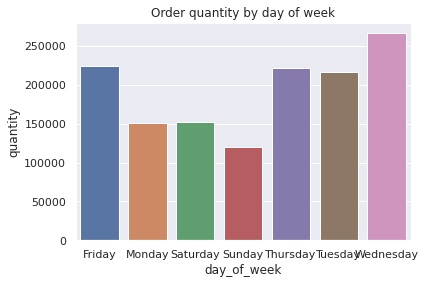

In [ ]:
import calendar
def get_day(x):
    day = calendar.day_name[x.weekday()]
    return day
private_data.info()
#private_data['date'] = pd.to_datetime(private_data['date'])
private_data['day_of_week'] = private_data['date'].map(get_day)
#private_data['Year'] = private_data['date'].map(lambda x: x.year)
#private_data['Month'] = private_data['date'].map(lambda x: x.month)
#private_data['Day'] = private_data['date'].map(lambda x: x.day)
private_data
#group by day of week
private_data_group_by_day = private_data.groupby(by=['day_of_week']).sum()
sns.barplot(x = private_data_group_by_day.index,
            y =private_data_group_by_day.quantity,
            data = private_data_group_by_day)
plt.title("Order quantity by day of week")
plt.show()

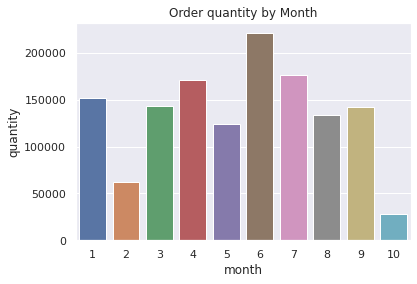

In [ ]:
#group by month
private_data_group_by_month = private_data.groupby(by=['month']).sum()
sns.barplot(x = private_data_group_by_month.index,
            y =private_data_group_by_month.quantity,
            data = private_data_group_by_month)
plt.title("Order quantity by Month")
plt.show()
#Interesting why does it miss Nov and Dec Month

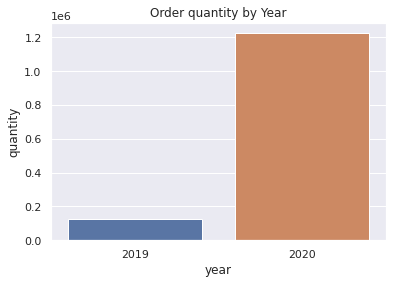

In [ ]:
#group by year
private_data_group_by_year = private_data.groupby(by=['year']).sum()
sns.barplot(x = private_data_group_by_year.index,
            y =private_data_group_by_year.quantity,
            data = private_data_group_by_year)
plt.title("Order quantity by Year")
plt.show()
#We have only two years : order count increase in 2020 year maybe il will be interesting to skip 2019 year

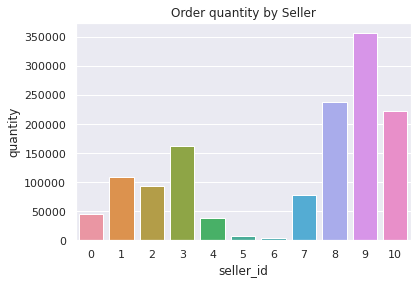

,,count
product_id,seller_id,
2187,10,1
2186,10,65
2185,10,39
2184,10,1423
2183,10,26
...,...,...
4,0,1
3,0,1
2,0,5


In [ ]:
#distribution des ventes par rapport au seller_id

private_data_group_by_seller = private_data.groupby(by=['seller_id']).sum()
sns.barplot(x = private_data_group_by_seller.index,
            y =private_data_group_by_seller.quantity,
            data = private_data_group_by_seller)
plt.title("Order quantity by Seller")
plt.show()
#it seems the seller_id 8,9 and 10 are increasing their sales: it will be interesting to see their rate and maybe their selling price
# we are going to take the most product sale and we will compare the sale price
most_popular_prod = private_data[private_data['product_id']==1948]
most_popular_prod['seller_id'].unique() #the most popular product is selling just by the seller id 9
#most_popular_prod_by_price = private_data.groupby(['product_id','seller_id']).agg({'average_selling_price': ['median','mean', 'min', 'max']})
groupby_df = (private_data.groupby(['product_id','seller_id'])['product_id'].agg(['count']).sort_values(by='product_id', ascending=False))
groupby_df #it seems that each product is selled by one seller

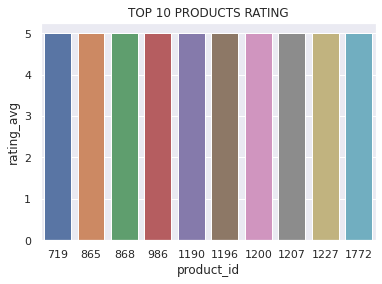

product_id
133    5.0
135    5.0
138    5.0
152    5.0
157    5.0
159    5.0
174    5.0
183    5.0
188    5.0
194    5.0
195    5.0
199    5.0
203    5.0
207    5.0
212    5.0
213    5.0
223    5.0
224    5.0
225    5.0
226    5.0
Name: rating_avg, dtype: float64

In [ ]:
# TOP 10 RATING PRODUCTS

df_group_by_pr = final_stamp.groupby(by=["product_id"]).mean()
df_top_10_rate = df_group_by_pr.sort_values(by='rating_avg', ascending=False).head(10)
sns.barplot(x = df_top_10_rate.index,
            y =df_top_10_rate.rating_avg,
            data = df_top_10_rate)
plt.title("TOP 10 PRODUCTS RATING")
plt.show()
df_top_10_rate
dt = final_stamp.groupby(['product_id']).agg({'rating_avg':'mean'})['rating_avg'].nlargest(20)
dt.head(20)# we want to see the top 20 or 10 rating of products but all are rating 5


In [ ]:
print("distribution marketplace dans private_data : \n",private_data['marketplace'].value_counts(normalize = True))
print("distribution marketplace dans final_stamp : \n",final_stamp['marketplace'].value_counts(normalize = True))

print("distribution date dans private_data : \n",private_data['year'].value_counts(normalize = True))
# l'année de distribution dans final_stamp est uniquement 2020

distribution marketplace dans private_data : 
 SHP    0.519145
LAZ    0.480855
Name: marketplace, dtype: float64
distribution marketplace dans final_stamp : 
 LAZ    0.789426
SHP    0.210574
Name: marketplace, dtype: float64
distribution date dans private_data : 
 2020    0.85024
2019    0.14976
Name: year, dtype: float64


# Merge des deux tableaux

In [ ]:
df = pd.merge(private_data, final_stamp, left_on=['marketplace', 'seller_id', 'product_id', 'variation_id', 'average_retail_price', 'average_selling_price'], 
              right_on=['marketplace', 'seller_id', 'product_id', 'variation_id', 'average_retail_price', 'average_selling_price'])

In [ ]:
df.head(10)

,quantity,order_count,average_retail_price,average_selling_price,marketplace,seller_id,product_id,variation_id,date,year,month,weekday,weekend,rating_avg,rating_count,review_count,stock
0,1,1,620000.0,489000.0,LAZ,0,0,0,2020-01-01,2020,1,2,0,4.9,124.0,43.0,117
1,1,1,620000.0,489000.0,LAZ,0,0,0,2020-01-01,2020,1,2,0,4.9,125.0,43.0,114
2,2,2,620000.0,489000.0,LAZ,0,0,0,2020-01-02,2020,1,3,0,4.9,124.0,43.0,117
3,2,2,620000.0,489000.0,LAZ,0,0,0,2020-01-02,2020,1,3,0,4.9,125.0,43.0,114
4,3,3,620000.0,489000.0,LAZ,0,0,0,2020-02-05,2020,2,2,0,4.9,124.0,43.0,117
5,3,3,620000.0,489000.0,LAZ,0,0,0,2020-02-05,2020,2,2,0,4.9,125.0,43.0,114
6,2,2,620000.0,489000.0,LAZ,0,0,0,2020-02-06,2020,2,3,0,4.9,124.0,43.0,117
7,2,2,620000.0,489000.0,LAZ,0,0,0,2020-02-06,2020,2,3,0,4.9,125.0,43.0,114
8,5,5,620000.0,489000.0,LAZ,0,0,0,2020-02-07,2020,2,4,0,4.9,124.0,43.0,117
9,5,5,620000.0,489000.0,LAZ,0,0,0,2020-02-07,2020,2,4,0,4.9,125.0,43.0,114


# Aggregation des variables

In [ ]:
# aggregation des variables

aggregation = {"quantity": "sum",
               "order_count": "sum",
               "average_retail_price": 'first',
               "average_selling_price": "first",
               'marketplace': 'first', 
               "seller_id": "first",
               'product_id': 'first',
               'variation_id': 'first',
              # "date": "nunique",
               "rating_avg": "mean",
               "rating_count": "max",
               "review_count": "max", 
               "stock": 'mean'}

df_train = df_train.groupby(['marketplace', 'seller_id', 'product_id', 'variation_id', 'average_retail_price', 'average_selling_price']).agg(aggregation)


# Dichotomisation des market place
df_train[['LAZ', 'SHP']] = pd.get_dummies(df_train['marketplace'])
df_train = df_train.drop(['marketplace'], axis = 1)
# Suppression de "Order count", la variable est liée à la cible
df_train = df_train.drop(['order_count'], axis = 1)

In [ ]:
# aggregation des variables

aggregation = {"quantity": "sum",
               "order_count": "sum",
               "average_retail_price": 'first',
               "average_selling_price": "first",
               'marketplace': 'first', 
               "seller_id": "first",
               'product_id': 'first',
               'variation_id': 'first',
              # "date": "nunique",
               "rating_avg": "mean",
               "rating_count": "max",
               "review_count": "max", 
               "stock": 'mean'}

df_test = df_test.groupby(['marketplace', 'seller_id', 'product_id', 'variation_id', 'average_retail_price', 'average_selling_price']).agg(aggregation)


# Dichotomisation des market place
df_test[['LAZ', 'SHP']] = pd.get_dummies(df_test['marketplace'])
df_test = df_test.drop(['marketplace'], axis = 1)
# Suppression de "Order count", la variable est liée à la cible
df_test = df_test.drop(['order_count'], axis = 1)

# Evaluation des modèles

In [ ]:
# chargement du fichier df (sans les orders counts)
df = df_new
df

quantity  \
marketplace seller_id product_id variation_id average_retail_price average_selling_price             
LAZ         0         0          0            620000.0             489000.0                     80   
                                                                   499000.0                    854   
                                                                   508000.0                     42   
                                                                   529000.0                   1200   
                                                                   559000.0                     35   
...                                                                                            ...   
SHP         10        2184       2548         198000.0             159000.0                    680   
                                                                   162000.0                     18   
                                                                   165000.0                     48   
                                                                   169000.0                    610   
                                                                   175000.0                    108   

                                                                                          average_retail_price  \
marketplace seller_id product_id variation_id average_retail_price average_selling_price                         
LAZ         0         0          0            620000.0             489000.0                           620000.0   
                                                                   499000.0                           620000.0   
                                                                   508000.0                           620000.0   
                                                                   529000.0                           620000.0   
                                                                   559000.0                           620000.0   
...                                                                                                        ...   
SHP         10        2184       2548         198000.0             159000.0                           198000.0   
                                                                   162000.0                           198000.0   
                                                                   165000.0                           198000.0   
                                                                   169000.0                           198000.0   
                                                                   175000.0                           198000.0   

                                                                                          average_selling_price  \
marketplace seller_id product_id variation_id average_retail_price average_selling_price                          
LAZ         0         0          0            620000.0             489000.0                            489000.0   
                                                                   499000.0                            499000.0   
                                                                   508000.0                            508000.0   
                                                                   529000.0                            529000.0   
                                                                   559000.0                            559000.0   
...                                                                                                         ...   
SHP         10        2184       2548         198000.0             159000.0                            159000.0   
                                                                   162000.0                            162000.0   
                                                                   165000.0                            165000.0   
               

In [ ]:
df = df.sort_values('date', ascending=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934990 entries, 873727 to 824007
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   quantity               934990 non-null  int64         
 1   order_count            934990 non-null  int64         
 2   average_retail_price   934990 non-null  int64         
 3   average_selling_price  934990 non-null  int64         
 4   marketplace            934990 non-null  object        
 5   seller_id              934990 non-null  int64         
 6   product_id             934990 non-null  int64         
 7   variation_id           934990 non-null  int64         
 8   date                   934990 non-null  datetime64[ns]
 9   year                   934990 non-null  int64         
 10  month                  934990 non-null  int64         
 11  weekday                934990 non-null  int64         
 12  weekend                934990 non-null 

In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934990 entries, 873727 to 824007
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   quantity               934990 non-null  int64         
 1   order_count            934990 non-null  int64         
 2   average_retail_price   934990 non-null  int64         
 3   average_selling_price  934990 non-null  int64         
 4   marketplace            934990 non-null  object        
 5   seller_id              934990 non-null  int64         
 6   product_id             934990 non-null  int64         
 7   variation_id           934990 non-null  int64         
 8   date                   934990 non-null  datetime64[ns]
 9   year                   934990 non-null  int64         
 10  month                  934990 non-null  int64         
 11  weekday                934990 non-null  int64         
 12  weekend                934990 non-null 

In [ ]:
df.set_index(df['date'], drop=True, inplace=True);

In [ ]:
#df[['LAZ', 'SHP']] = pd.get_dummies(df['marketplace'])
#df = df.drop(['marketplace'], axis = 1)

# Suppression de "Order count", la variable est liée à la cible
#df = df.drop(['order_count'], axis = 1)
split_date = pd.to_datetime('01.09.2020', format='%d.%m.%Y')
df_train = df.loc[df.index <= split_date].copy()
df_test = df.loc[df.index > split_date].copy()

In [ ]:
df[['LAZ', 'SHP']] = pd.get_dummies(df['marketplace'])
df = df.drop(['marketplace'], axis = 1)

# Suppression de "Order count", la variable est liée à la cible
df = df.drop(['order_count'], axis = 1)

In [ ]:
df.head()

quantity  \
marketplace seller_id product_id variation_id average_retail_price average_selling_price             
LAZ         0         0          0            620000.0             489000.0                     80   
                                                                   499000.0                    854   
                                                                   508000.0                     42   
                                                                   529000.0                   1200   
                                                                   559000.0                     35   

                                                                                          average_retail_price  \
marketplace seller_id product_id variation_id average_retail_price average_selling_price                         
LAZ         0         0          0            620000.0             489000.0                           620000.0   
                                                                   499000.0                           620000.0   
                                                                   508000.0                           620000.0   
                                                                   529000.0                           620000.0   
                                                                   559000.0                           620000.0   

                                                                                          average_selling_price  \
marketplace seller_id product_id variation_id average_retail_price average_selling_price                          
LAZ         0         0          0            620000.0             489000.0                            489000.0   
                                                                   499000.0                            499000.0   
                                                                   508000.0                            508000.0   
                                                                   529000.0                            529000.0   
                                                                   559000.0                            559000.0   

                                                                                          seller_id  \
marketplace seller_id product_id variation_id average_retail_price average_selling_price              
LAZ         0         0          0            620000.0             489000.0                       0   
                                                                   499000.0                       0   
                                                                   508000.0                       0   
                                                                   529000.0                       0   
                                                                   559000.0                       0   

                                                                                          product_id  \
marketplace seller_id product_id variation_id average_retail_price average_selling_price               
LAZ         0         0          0            620000.0             489000.0                        0   
                                                                   499000.0                        0   
                                                                   508000.0                        0   
                                                                   529000.0                        0   
                                                                   559000.0                        0   

                                                                                          variation_id  \
marketplace seller_id product_id variation_id average_retail_price average_selling_price                 
LAZ         0         0          0            620000.0             489000.0                          0   
 

In [ ]:
df_test.index.unique()

MultiIndex([('LAZ',  0,    0,    0,  620000.0,  499000.0),
            ('LAZ',  0,    0,    0,  620000.0,  529000.0),
            ('LAZ',  0,    0,    0,  620000.0,  620000.0),
            ('LAZ',  0,    1,    1, 1250000.0, 1129000.0),
            ('LAZ',  0,    7,    7,  242000.0,  219000.0),
            ('LAZ',  0,    8,    8,  520000.0,  439000.0),
            ('LAZ',  0,    8,    8,  520000.0,  469000.0),
            ('LAZ',  0,    9,    9,  242000.0,  208000.0),
            ('LAZ',  0,   10,   10,  605000.0,  499000.0),
            ('LAZ',  0,   10,   10,  605000.0,  509000.0),
            ...
            ('SHP', 10, 2174, 2520,   88000.0,   79000.0),
            ('SHP', 10, 2180, 1878,  188000.0,  159000.0),
            ('SHP', 10, 2184, 2544,  198000.0,  169000.0),
            ('SHP', 10, 2184, 2544,  198000.0,  179000.0),
            ('SHP', 10, 2184, 2545,  198000.0,  149000.0),
            ('SHP', 10, 2184, 2545,  198000.0,  169000.0),
            ('SHP', 10, 2184, 2546,  198

In [ ]:
df_test.head()

quantity  \
marketplace seller_id product_id variation_id average_retail_price average_selling_price             
LAZ         0         0          0            620000.0             499000.0                    305   
                                                                   529000.0                     30   
                                                                   620000.0                      5   
                      1          1            1250000.0            1129000.0                    82   
                      7          7            242000.0             219000.0                     31   

                                                                                          average_retail_price  \
marketplace seller_id product_id variation_id average_retail_price average_selling_price                         
LAZ         0         0          0            620000.0             499000.0                           620000.0   
                                                                   529000.0                           620000.0   
                                                                   620000.0                           620000.0   
                      1          1            1250000.0            1129000.0                         1250000.0   
                      7          7            242000.0             219000.0                           242000.0   

                                                                                          average_selling_price  \
marketplace seller_id product_id variation_id average_retail_price average_selling_price                          
LAZ         0         0          0            620000.0             499000.0                            499000.0   
                                                                   529000.0                            529000.0   
                                                                   620000.0                            620000.0   
                      1          1            1250000.0            1129000.0                          1129000.0   
                      7          7            242000.0             219000.0                            219000.0   

                                                                                          seller_id  \
marketplace seller_id product_id variation_id average_retail_price average_selling_price              
LAZ         0         0          0            620000.0             499000.0                       0   
                                                                   529000.0                       0   
                                                                   620000.0                       0   
                      1          1            1250000.0            1129000.0                      0   
                      7          7            242000.0             219000.0                       0   

                                                                                          product_id  \
marketplace seller_id product_id variation_id average_retail_price average_selling_price               
LAZ         0         0          0            620000.0             499000.0                        0   
                                                                   529000.0                        0   
                                                                   620000.0                        0   
                      1          1            1250000.0            1129000.0                       1   
                      7          7            242000.0             219000.0                        7   

                                                                                          variation_id  \
marketplace seller_id product_id variation_id average_retail_price average_selling_price                 
LAZ         0         0          0            620000.0             499000.0                          0   
 

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5618 entries, ('LAZ', 0, 0, 0, 620000, 489000) to ('SHP', 10, 2184, 2548, 198000, 175000)
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quantity               5618 non-null   int64  
 1   average_retail_price   5618 non-null   int64  
 2   average_selling_price  5618 non-null   int64  
 3   seller_id              5618 non-null   int64  
 4   product_id             5618 non-null   int64  
 5   variation_id           5618 non-null   int64  
 6   rating_avg             5618 non-null   float64
 7   rating_count           5618 non-null   float64
 8   review_count           5618 non-null   float64
 9   stock                  5618 non-null   float64
 10  LAZ                    5618 non-null   uint8  
 11  SHP                    5618 non-null   uint8  
dtypes: float64(4), int64(6), uint8(2)
memory usage: 528.3+ KB


In [ ]:
def create_features(df, label=None):
 df['hour'] = df['date'].dt.hour
 df['dayofweek'] = df['date'].dt.dayofweek
 df['quarter'] = df['date'].dt.quarter
 df['month'] = df['date'].dt.month
 df['year'] = df['date'].dt.year
 df['dayofyear'] = df['date'].dt.dayofyear
 df['dayofmonth'] = df['date'].dt.day
 df['weekofyear'] = df['date'].dt.weekofyear
 X = df[[
 'dayofweek', 'quarter', 'month', 'year', 'dayofyear',
 'dayofmonth', 'weekofyear'
 ]]
 if label:
   y = df[label]
   return X, y
 return X
X_train, y_train = create_features(df_train, label='quantity')
X_test, y_test = create_features(df_test, label='quantity')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


In [ ]:

quantity_train = df_train.quantity
quantity_test = df_test.quantity
#df_train =df_train.drop("quantity", axis=1)
#df_test =df_test.drop("quantity", axis=1)
#df_train =df_train.drop("date", axis=1)
#df_test =df_test.drop("date", axis=1)
#X_train, y_train = df_train.drop("quantity"),quantity_train
#X_test, y_test = df_test.drop("quantity"),quantity_test

In [ ]:
X_train =df_train.copy()
X_test =df_test.copy()
X_train.head()

,quantity,average_retail_price,average_selling_price,seller_id,product_id,variation_id,date,year,month,weekday,weekend,tot_selling_price,rating_avg,rating_count,review_count,stock,LAZ,SHP
date,,,,,,,,,,,,,,,,,,
2019-01-01,4,198000,169000,9,1811,1878,2019-01-01,2019,1,1,0,676000,4.842791,2150.0,713.0,242,0,1
2019-01-01,2,175000,159000,1,247,247,2019-01-01,2019,1,1,0,318000,4.700000,407.0,141.0,80,1,0
2019-01-01,2,175000,159000,1,247,247,2019-01-01,2019,1,1,0,318000,4.700000,407.0,141.0,80,1,0
2019-01-01,2,175000,159000,1,247,247,2019-01-01,2019,1,1,0,318000,4.700000,416.0,144.0,31,1,0
2019-01-01,1,225000,189000,1,261,261,2019-01-01,2019,1,1,0,189000,4.600000,369.0,144.0,38,1,0


In [ ]:
X_test.head()

quantity  \
marketplace seller_id product_id variation_id average_retail_price average_selling_price             
LAZ         0         0          0            620000.0             499000.0                    305   
                                                                   529000.0                     30   
                                                                   620000.0                      5   
                      1          1            1250000.0            1129000.0                    82   
                      7          7            242000.0             219000.0                     31   

                                                                                          average_retail_price  \
marketplace seller_id product_id variation_id average_retail_price average_selling_price                         
LAZ         0         0          0            620000.0             499000.0                           620000.0   
                                                                   529000.0                           620000.0   
                                                                   620000.0                           620000.0   
                      1          1            1250000.0            1129000.0                         1250000.0   
                      7          7            242000.0             219000.0                           242000.0   

                                                                                          average_selling_price  \
marketplace seller_id product_id variation_id average_retail_price average_selling_price                          
LAZ         0         0          0            620000.0             499000.0                            499000.0   
                                                                   529000.0                            529000.0   
                                                                   620000.0                            620000.0   
                      1          1            1250000.0            1129000.0                          1129000.0   
                      7          7            242000.0             219000.0                            219000.0   

                                                                                          seller_id  \
marketplace seller_id product_id variation_id average_retail_price average_selling_price              
LAZ         0         0          0            620000.0             499000.0                       0   
                                                                   529000.0                       0   
                                                                   620000.0                       0   
                      1          1            1250000.0            1129000.0                      0   
                      7          7            242000.0             219000.0                       0   

                                                                                          product_id  \
marketplace seller_id product_id variation_id average_retail_price average_selling_price               
LAZ         0         0          0            620000.0             499000.0                        0   
                                                                   529000.0                        0   
                                                                   620000.0                        0   
                      1          1            1250000.0            1129000.0                       1   
                      7          7            242000.0             219000.0                        7   

                                                                                          variation_id  \
marketplace seller_id product_id variation_id average_retail_price average_selling_price                 
LAZ         0         0          0            620000.0             499000.0                          0   
 

In [ ]:
df_train.head()

quantity  \
marketplace seller_id product_id variation_id average_retail_price average_selling_price             
LAZ         0         0          0            620000.0             489000.0                     80   
                                                                   499000.0                    549   
                                                                   508000.0                     42   
                                                                   529000.0                   1170   
                                                                   559000.0                     35   

                                                                                          average_retail_price  \
marketplace seller_id product_id variation_id average_retail_price average_selling_price                         
LAZ         0         0          0            620000.0             489000.0                           620000.0   
                                                                   499000.0                           620000.0   
                                                                   508000.0                           620000.0   
                                                                   529000.0                           620000.0   
                                                                   559000.0                           620000.0   

                                                                                          average_selling_price  \
marketplace seller_id product_id variation_id average_retail_price average_selling_price                          
LAZ         0         0          0            620000.0             489000.0                            489000.0   
                                                                   499000.0                            499000.0   
                                                                   508000.0                            508000.0   
                                                                   529000.0                            529000.0   
                                                                   559000.0                            559000.0   

                                                                                          seller_id  \
marketplace seller_id product_id variation_id average_retail_price average_selling_price              
LAZ         0         0          0            620000.0             489000.0                       0   
                                                                   499000.0                       0   
                                                                   508000.0                       0   
                                                                   529000.0                       0   
                                                                   559000.0                       0   

                                                                                          product_id  \
marketplace seller_id product_id variation_id average_retail_price average_selling_price               
LAZ         0         0          0            620000.0             489000.0                        0   
                                                                   499000.0                        0   
                                                                   508000.0                        0   
                                                                   529000.0                        0   
                                                                   559000.0                        0   

                                                                                          variation_id  \
marketplace seller_id product_id variation_id average_retail_price average_selling_price                 
LAZ         0         0          0            620000.0             489000.0                          0   
 

In [ ]:
X_train =X_train.drop("quantity", axis=1)
X_test =X_test.drop("quantity", axis=1)
y_train = quantity_train
y_test = quantity_test

In [ ]:
X_train =X_train.drop("date", axis=1)
X_test =X_test.drop("date", axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
df.date.unique()

array(['2019-01-01T00:00:00.000000000', '2019-01-02T00:00:00.000000000',
       '2019-01-03T00:00:00.000000000', '2019-01-04T00:00:00.000000000',
       '2019-01-05T00:00:00.000000000', '2019-01-06T00:00:00.000000000',
       '2019-01-07T00:00:00.000000000', '2019-01-08T00:00:00.000000000',
       '2019-01-09T00:00:00.000000000', '2019-01-10T00:00:00.000000000',
       '2019-01-11T00:00:00.000000000', '2019-01-12T00:00:00.000000000',
       '2019-01-13T00:00:00.000000000', '2019-01-14T00:00:00.000000000',
       '2019-01-15T00:00:00.000000000', '2019-01-16T00:00:00.000000000',
       '2019-01-17T00:00:00.000000000', '2019-01-18T00:00:00.000000000',
       '2019-01-19T00:00:00.000000000', '2019-01-20T00:00:00.000000000',
       '2019-01-21T00:00:00.000000000', '2019-01-22T00:00:00.000000000',
       '2019-01-23T00:00:00.000000000', '2019-01-24T00:00:00.000000000',
       '2019-01-25T00:00:00.000000000', '2019-01-26T00:00:00.000000000',
       '2019-01-27T00:00:00.000000000', '2019-01-28

In [ ]:
import xgboost as xgb
xgbr = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)
xgbr.fit(X_train, y_train)
#print(X_train)

[08:03:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
rfr_best = RandomForestRegressor(n_estimators = 1000, min_samples_split = 3, max_depth = None, criterion = 'mae')
rfr_best.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


In [ ]:
print(xgbr.score(X_train, y_train))

0.9963524622571056


In [ ]:
# A parameter grid for XGBoost
params = {
    'min_child_weight': [4, 5],
    'gamma': [i / 10.0 for i in range(3, 6)],
    'subsample': [i / 10.0 for i in range(6, 11)],
    'colsample_bytree': [i / 10.0 for i in range(6, 11)],
    'max_depth': [2, 3, 4]
}
# Initialize XGB and GridSearch
xgb_reg = xgb.XGBRegressor(nthread=-1, objective='reg:squarederror')
grid = GridSearchCV(xgb_reg, params)
grid.fit(X_train, y_train)
gridcv_xgb = grid.best_estimator_
print(r2_score(y_test, gridcv_xgb.predict(X_test)))

KeyboardInterrupt: ignored

In [ ]:
from warnings import filterwarnings
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import plot_importance, plot_tree
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import time

In [ ]:
df_test['Prediction'] = xgbr.predict(X_test)


In [ ]:
df_test['Prediction2'] = xgbr.predict(X_train)

ValueError: ignored

In [ ]:
df_test.head()

,quantity,average_retail_price,average_selling_price,seller_id,product_id,variation_id,date,year,month,weekday,weekend,tot_selling_price,rating_avg,rating_count,review_count,stock,LAZ,SHP,Prediction
date,,,,,,,,,,,,,,,,,,,
2020-09-02,1,1240000,689000,0,196,196,2020-09-02,2020,9,2,0,689000,4.8,9.0,2.0,9,1,0,1.075287
2020-09-02,1,1240000,689000,0,196,196,2020-09-02,2020,9,2,0,689000,4.8,9.0,2.0,9,1,0,1.075287
2020-09-02,1,1240000,689000,0,196,196,2020-09-02,2020,9,2,0,689000,4.8,9.0,2.0,9,1,0,1.075287
2020-09-02,2,600000,399000,1,319,319,2020-09-02,2020,9,2,0,798000,4.9,546.0,185.0,185,1,0,2.191283
2020-09-02,1,1240000,689000,0,196,196,2020-09-02,2020,9,2,0,689000,4.8,10.0,2.0,20,1,0,1.075287


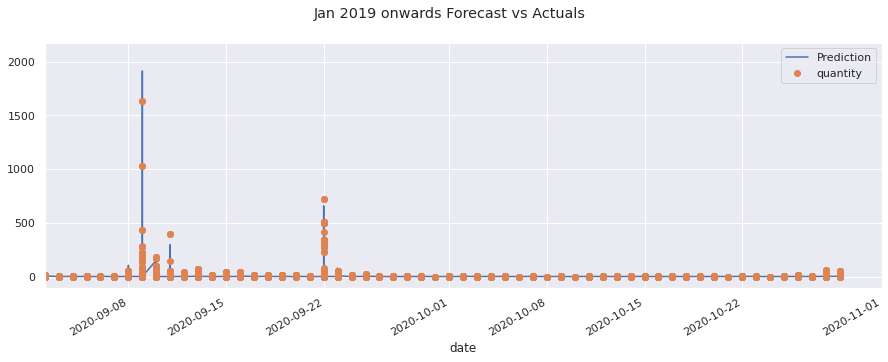

In [ ]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
#df_all = pd.concat([df_test, df_train], sort=False)
_ = df_all[['Prediction','quantity']].plot(ax=ax, style=['-','o'])
ax.set_xbound(lower='2020-09-02', upper='2020-11-01')
plot = plt.suptitle('Jan 2019 onwards Forecast vs Actuals')

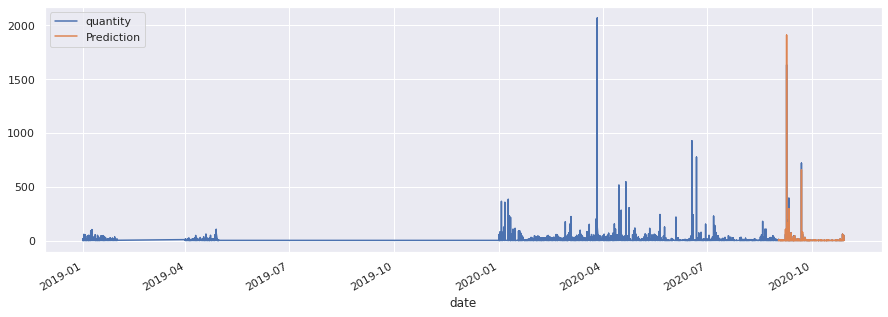

In [ ]:
df_all = pd.concat([df_test, df_train], sort=False)
_ = df_all[['quantity','Prediction']].plot(figsize=(15, 5))

In [ ]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = df_all[['Prediction','quantity']].plot(ax=ax, style=[‘-’,’o’])
ax.set_xbound(lower=’2019–09–01', upper=’2019–10–01')
plot = plt.suptitle(‘Jan 2019 onwards Forecast vs Actuals’)

In [ ]:
aggregation = {"quantity": "sum","Prediction":"sum"}
df_test_2 = df_test.reset_index(drop=True)
df_test_2 


,quantity,average_retail_price,average_selling_price,seller_id,product_id,variation_id,date,year,month,weekday,weekend,tot_selling_price,rating_avg,rating_count,review_count,stock,LAZ,SHP,Prediction
0,1,1240000,689000,0,196,196,2020-09-02,2020,9,2,0,689000,4.8,9.0,2.0,9,1,0,1.075287
1,1,1240000,689000,0,196,196,2020-09-02,2020,9,2,0,689000,4.8,9.0,2.0,9,1,0,1.075287
2,1,1240000,689000,0,196,196,2020-09-02,2020,9,2,0,689000,4.8,9.0,2.0,9,1,0,1.075287
3,2,600000,399000,1,319,319,2020-09-02,2020,9,2,0,798000,4.9,546.0,185.0,185,1,0,2.191283
4,1,1240000,689000,0,196,196,2020-09-02,2020,9,2,0,689000,4.8,10.0,2.0,20,1,0,1.075287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86209,1,1045000,639000,0,205,205,2020-10-29,2020,10,3,0,639000,4.5,4.0,3.0,22,1,0,1.150226
86210,1,1045000,639000,0,205,205,2020-10-29,2020,10,3,0,639000,4.5,4.0,3.0,22,1,0,1.150226
86211,1,1045000,639000,0,205,205,2020-10-29,2020,10,3,0,639000,4.5,4.0,3.0,19,1,0,1.150226
86212,1,1045000,639000,0,205,205,2020-10-29,2020,10,3,0,639000,4.5,4.0,3.0,25,1,0,1.150226


In [ ]:
aggregation = {"quantity": "sum"}
df_train_2 = df_train.reset_index(drop=True)
df_train_2 

,quantity,average_retail_price,average_selling_price,seller_id,product_id,variation_id,date,year,month,weekday,weekend,tot_selling_price,rating_avg,rating_count,review_count,stock,LAZ,SHP
0,4,198000,169000,9,1811,1878,2019-01-01,2019,1,1,0,676000,4.842791,2150.0,713.0,242,0,1
1,2,175000,159000,1,247,247,2019-01-01,2019,1,1,0,318000,4.700000,407.0,141.0,80,1,0
2,2,175000,159000,1,247,247,2019-01-01,2019,1,1,0,318000,4.700000,407.0,141.0,80,1,0
3,2,175000,159000,1,247,247,2019-01-01,2019,1,1,0,318000,4.700000,416.0,144.0,31,1,0
4,1,225000,189000,1,261,261,2019-01-01,2019,1,1,0,189000,4.600000,369.0,144.0,38,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848771,1,400000,400000,4,852,1229,2020-09-01,2020,9,1,0,400000,4.800000,103.0,37.0,1,1,0
848772,1,400000,400000,4,852,1229,2020-09-01,2020,9,1,0,400000,4.800000,102.0,37.0,3,1,0
848773,1,1300000,899000,1,411,411,2020-09-01,2020,9,1,0,899000,4.500000,8.0,4.0,175,1,0
848774,1,400000,400000,4,852,1229,2020-09-01,2020,9,1,0,400000,4.800000,102.0,37.0,4,1,0


In [ ]:
df_test_2= df_test_2.groupby(['date']).agg(aggregation)

In [ ]:
df_train_2= df_train_2.groupby(['date']).agg(aggregation)

In [ ]:
df_train_2

,quantity
date,
2019-01-01,606
2019-01-02,785
2019-01-03,1332
2019-01-04,952
2019-01-05,973
...,...
2020-08-28,4611
2020-08-29,5074
2020-08-30,2403


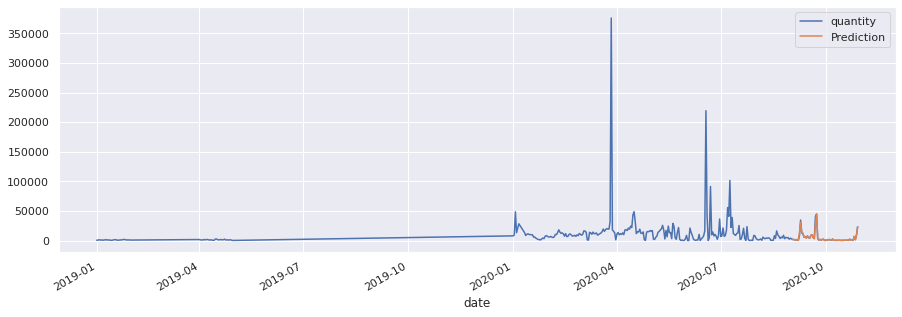

In [ ]:
df_all = pd.concat([df_test_2, df_train_2], sort=False)
_ = df_all[['quantity','Prediction']].plot(figsize=(15, 5))

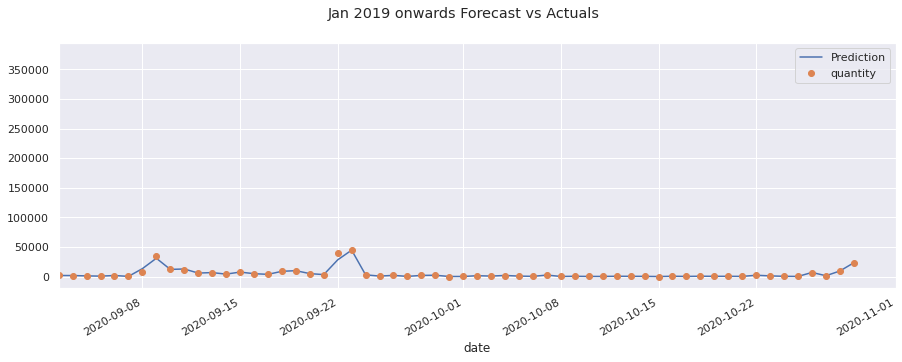

In [ ]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
#df_all = pd.concat([df_test, df_train], sort=False)
_ = df_all[['Prediction','quantity']].plot(ax=ax, style=['-','o'])
ax.set_xbound(lower='2020-09-02', upper='2020-11-01')
plot = plt.suptitle('Jan 2019 onwards Forecast vs Actuals')

In [ ]:
df_test_2

,quantity,Prediction
date,,
2020-09-02,1935,1948.702026
2020-09-03,1703,1843.630249
2020-09-04,1150,1249.595459
2020-09-05,743,867.800476
2020-09-06,1814,1888.265259
2020-09-07,388,441.012543
2020-09-08,8410,13511.258789
2020-09-09,34723,31067.304688
2020-09-10,13294,12237.288086


In [ ]:
df_test_2


NameError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
df = pd.read_csv('data_sans_ordercount.csv')
X = df.drop("quantity", axis=1)
y = df["quantity"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train_scaled, y_train)
print('Score du modèle Gradient Boosting Regressor :',model.score(X_test_scaled, y_test))

Score du modèle Gradient Boosting Regressor : 0.8720612627754997


In [ ]:
import sklearn.metrics as metrics
y_pred = model.predict(X_test_scaled)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
# Printing the metrics
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

R2 square: 0.8725154096921302
MAE:  410.09605360089387
MSE:  2980106.2752648033


In [ ]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]}
grid_GBR = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train_scaled, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [ ]:
print('Score du modèle Gradient Boosting Regressor :',grid_GBR.score(X_train_scaled, y_train))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


Score du modèle Gradient Boosting Regressor : 0.1442338812964995


In [ ]:
grid_GBR.best_params_

{'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 1500, 'subsample': 0.9}

In [ ]:
parameters = {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 1500, 'subsample': 0.9}
model = GradientBoostingRegressor(learning_rate= 0.01, max_depth= 6, n_estimators= 1500, subsample= 0.9)

model.fit(X_train_scaled, y_train)
print(model.score(X_train_scaled, y_train))

0.998202379272007


In [ ]:
y_pred = lin_reg.predict(x_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
# Printing the metrics
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

In [ ]:
#Regresson linéaire multiple

from sklearn.feature_selection import SelectFromModel
from sklearn import model_selection

lr = LinearRegression()
sfm = SelectFromModel(lr)


sfm_train = sfm.fit_transform(X_train_scaled, y_train)
sfm_test = sfm.transform(X_test_scaled)

X.columns[sfm.get_support()]

sfmlr = LinearRegression()
sfmlr.fit(sfm_train, y_train)

print(sfmlr.score(sfm_train, y_train))
print(sfmlr.score(sfm_test, y_test))

0.15950699540658153
0.16534792964427458


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

In [ ]:
# modèle SVR(support vector regressor)

svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)
score_svr = svr_model.score(X_test_scaled, y_test)

print('score_svr_model:', score_svr)

score_svr_model: -0.00755259948240905


In [ ]:
# Optimisation SVR en variant les hyperparamètres

svr = SVR()
parameters = {'C': [0.1, 1, 10, 12, 15, 20], 'kernel': ['rbf', 'linear', 'poly'], 'gamma': [0.001, 0.01, 0.1, 0.5, 1]}
grid_svr = GridSearchCV(estimator = svr, param_grid = parameters)
grid_svr.fit(X_train_scaled, y_train)
grid_svr.best_params_

KeyboardInterrupt: ignored

In [ ]:
svr_best = SVR(kernel = 'poly', gamma = 0.5, C = 10)
svr_best.fit(X_train_scaled, y_train)
score_best = svr_best.score(X_test_scaled, y_test)

print('score du modèle SVR:', score_best)

In [ ]:
# arbre de décision (Decision Tree Regressor)

dtr = DecisionTreeRegressor()
dtr.fit(X_train_scaled, y_train)
score_dtr = dtr.score(X_test_scaled, y_test)
score_dtr

0.6054556961068414

In [ ]:
# optim score decision tree avec les hyperparamètres:
parameters = {'criterion': ["mse", "mae"], "splitter":["best","random"], "max_depth": [2, 4, 6, 8, 10]}

dtr_cv = GridSearchCV(estimator = dtr, param_grid = parameters, cv = 5)
dtr_cv.fit(X_train_scaled, y_train)

dtr_cv.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: 

{'criterion': 'mse', 'max_depth': 10, 'splitter': 'best'}

In [ ]:
dt_clf = DecisionTreeRegressor(criterion = 'mae', max_depth = 10, splitter = 'random')
dt_clf.fit(X_train_scaled, y_train)
score = dt_clf.score(X_test_scaled, y_test)
print('score du modèle Decision Tree:', score)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


score du modèle Decision Tree: 0.8070234077618519


In [ ]:
import sklearn.metrics as metrics
y_pred = dt_clf.predict(X_test_scaled)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
# Printing the metrics
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

R2 square: 0.8070234077618519
MAE:  350.8702993092863
MSE:  4511060.92210284


In [ ]:
# forêts aléatoires (Random Forest)

rf_clf = RandomForestRegressor()
rf_clf.fit(X_train_scaled, y_train)
score_rf = rf_clf.score(X_test_scaled, y_test)
print('score du modèle Random forest:', score_rf)

score du modèle Random forest: 0.8907842227075399


In [ ]:
# optim score rf avec les hyperparamètres:

parameters = {'n_estimators': [100, 200, 300, 500, 700, 1000], 'max_depth': [None, 1, 2, 3, 4, 5], 
              'min_samples_split': [1, 2, 3, 4]}

rfr_cv = GridSearchCV(estimator = rf_clf, param_grid = parameters, cv = 5)
rfr_cv.fit(X_train_scaled, y_train)

rfr_cv.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/p

{'max_depth': None, 'min_samples_split': 3, 'n_estimators': 1000}

In [ ]:
rfr_best = RandomForestRegressor(n_estimators = 1000, min_samples_split = 3, max_depth = None, criterion = 'mae')
rfr_best.fit(X_train_scaled, y_train)
score_rfr_best = rfr_best.score(X_test_scaled, y_test)
score_rfr_best

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


0.8832447408683058

In [ ]:
import sklearn.metrics as metrics
y_pred = rfr_best.predict(X_test_scaled)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
# Printing the metrics
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

R2 square: 0.8832447408683058
MAE:  342.9636043745203
MSE:  2729295.200057216


In [ ]:
#RIDGECV
from sklearn.linear_model import RidgeCV


ridge_reg = RidgeCV(alphas= (0.001, 0.01, 0.1, 0.3, 0.7, 1, 10, 50, 100))
ridge_reg.fit(X_train_scaled, y_train)
score_ridge_best = ridge_reg.score(X_test_scaled, y_test)
score_ridge_best

0.16676196125006115

In [ ]:
#print('alpha sélectionné par c-v :', ridge_reg.alpha_)
print('score train :', ridge_reg.score(X_train_scaled, y_train))
print('score test :', ridge_reg.score(X_test_scaled, y_test))

score train : 0.16979792756131862
score test : 0.16676196125006115


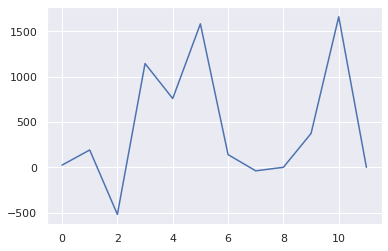

In [ ]:
#LASSO
from sklearn.linear_model import Lasso

lasso_r = Lasso(alpha=1)

lasso_r.fit(X_train_scaled, y_train)
lasso_coef = lasso_r.coef_
#plot coeff for each variable
plt.plot(range(len(X.columns)), lasso_coef)
#3 variables selectionned from the model


In [ ]:
#lasso score
print('score train :', lasso_r.score(X_train_scaled, y_train))
print('score test :', lasso_r.score(X_test_scaled, y_test)) 

score train : 0.17013021787584526
score test : 0.1672686644812411


In [ ]:
#predict with lasso
#lasso_pred_train = lasso_reg.predict(X_train)
#lasso_pred_test = lasso_reg.predict(X_test)

#print('mse train :', mean_squared_error(lasso_pred_train, y_train))
#print('mse test :', mean_squared_error(lasso_pred_test, y_test))

In [ ]:
#optimize alpha with lasso path
from sklearn.linear_model import lasso_path

mes_alphas = (0.001, 0.01, 0.02, 0.025, 0.05, 0.1, 0.25, 0.5, 0.8, 1.0)

alpha_path, coefs_lasso, _ = lasso_path(X_train, y_train, alphas=mes_alphas)

coefs_lasso.shape

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36731924083.16768, tolerance: 8997723.4735
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36707180324.39485, tolerance: 8997723.4735
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36680565551.71269, tolerance: 8997723.4735
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36662581575.14481, toleranc

(12, 10)

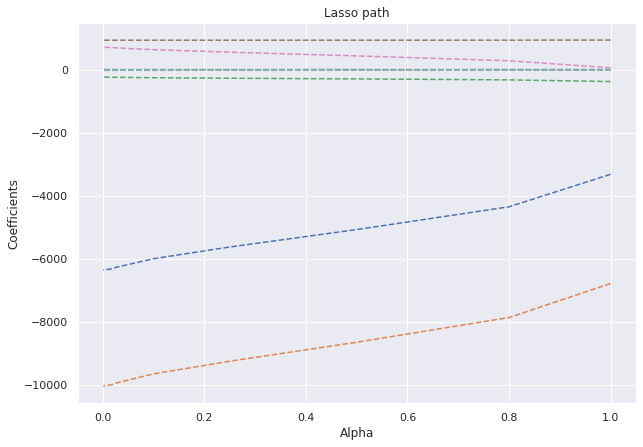

In [ ]:
#plot alpha with different coeff
plt.figure(figsize=(10, 7))

for i in range(coefs_lasso.shape[0]):
    plt.plot(alpha_path, coefs_lasso[i,:], '--')

plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso path');


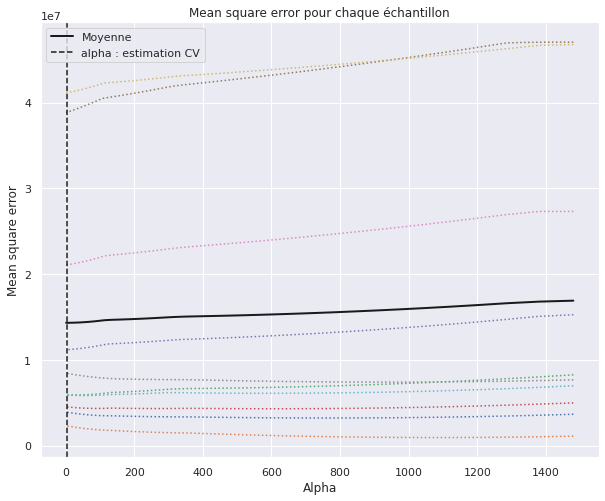

In [ ]:
from sklearn.linear_model import LassoCV

model_lasso = LassoCV(cv=10).fit(X_train_scaled, y_train)

alphas = model_lasso.alphas_

plt.figure(figsize=(10, 8))

plt.plot(alphas, model_lasso.mse_path_, ':')
plt.plot(alphas, model_lasso.mse_path_.mean(axis=1), 'k', label='Moyenne', linewidth=2)

plt.axvline(model_lasso.alpha_, linestyle='--', color='k', label='alpha : estimation CV')

plt.xlabel('Alpha')
plt.ylabel('Mean square error')
plt.title('Mean square error pour chaque échantillon')
plt.legend();

In [ ]:
print('score test :', model_lasso.score(X_test_scaled, y_test))
print('selectioned alpha ',model_lasso.alpha_)


score test : 0.16725056201024024
selectioned alpha  5.569788872020896


In [ ]:
#elastic net cv
from sklearn.linear_model import ElasticNetCV

l1_ratio=(0.1, 0.25, 0.5, 0.7, 0.75, 0.8, 0.85, 0.9, 0.99)
alphas=(0.001, 0.01, 0.02, 0.025, 0.05, 0.1, 0.25, 0.5, 0.8, 1.0)
model_en = ElasticNetCV(l1_ratio=l1_ratio,alphas=alphas,cv=8)

model_en.fit(X_train_scaled,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34681456615.18467, tolerance: 8609151.814982794
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35113141115.710396, tolerance: 8680211.12665248
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34012608497.440334, tolerance: 8254713.4257915085
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3290640177

ElasticNetCV(alphas=(0.001, 0.01, 0.02, 0.025, 0.05, 0.1, 0.25, 0.5, 0.8, 1.0),
             cv=8, l1_ratio=(0.1, 0.25, 0.5, 0.7, 0.75, 0.8, 0.85, 0.9, 0.99))

In [ ]:
#print intercept
coeffs = list(model_en.coef_)
coeffs.insert(0, model_en.intercept_)
feats = list(X.columns)
feats.insert(0, 'intercept')

pd.DataFrame({'valeur estimée': coeffs}, index=feats)

,valeur estimée
intercept,563.315992
average_retail_price,9.750071
average_selling_price,213.455713
seller_id,-0.000000
product_id,534.622771
variation_id,741.834750
month,1548.990973
rating_avg,157.702925
rating_count,-36.647353
review_count,0.000000


In [ ]:
#score with elastic net
print('score train :', model_en.score(X_train_scaled, y_train))
print('score test :', model_en.score(X_test_scaled, y_test))

score train : 0.16972860204014983
score test : 0.16666280000516098


In [ ]:
#Predict whith XGB regressor
import gc
import pickle
from xgboost import XGBRegressor
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

xgbr = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [ ]:
xgbr.fit(X_train_scaled, y_train)

[21:28:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
import sklearn.metrics as metrics
y_pred = xgbr.predict(X_test_scaled)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
# Printing the metrics
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

R2 square: 0.8893311279221865
MAE:  401.32517177721945
MSE:  2587018.5514900633


In [ ]:
print('score train :', xgbr.score(X_train_scaled, y_train))
print('score test :', xgbr.score(X_test_scaled, y_test))

score train : 0.9142425475318345
score test : 0.8893311279221865


In [ ]:
params = {
    'min_child_weight': [4, 5],
    'gamma': [i / 10.0 for i in range(3, 6)],
    'subsample': [i / 10.0 for i in range(6, 11)],
    'colsample_bytree': [i / 10.0 for i in range(6, 11)],
    'max_depth': [2, 3, 4]
}
# Initialize XGB and GridSearch
xgb_reg = XGBRegressor(nthread=-1, objective='reg:squarederror')
grid = GridSearchCV(xgb_reg, params)
grid.fit(X_train_scaled, y_train)

GridSearchCV(estimator=XGBRegressor(nthread=-1, objective='reg:squarederror'),
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
                         'gamma': [0.3, 0.4, 0.5], 'max_depth': [2, 3, 4],
                         'min_child_weight': [4, 5],
                         'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]})

In [ ]:
print('score train :', grid.score(X_train_scaled, y_train))
print('score test :', grid.score(X_test_scaled, y_test))

score train : 0.9519402116681797
score test : 0.923980118983158


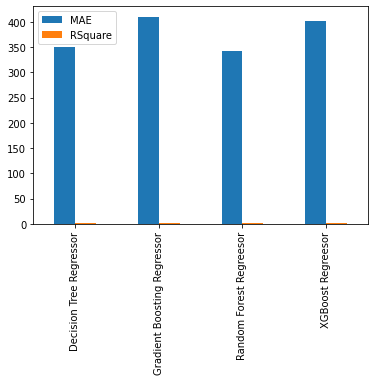

In [ ]:
import pandas as pd
from pandas import DataFrame,Series
mae=[350.9,410.0,342.9,401.3]
r_square=[0.62,0.94,0.89,0.95]

col={'MAE':mae,'RSquare':r_square}
models=['Decision Tree Regressor','Gradient Boosting Regressor','Random Forest Regreesor','XGBoost Regreesor']
df=DataFrame(data=col,index=models)
df

#fig = plt.figure()
df.plot(kind='bar')

In [ ]:
print('score train :', xgbr.score(X_train_scaled, y_train))
print('score test :', xgbr.score(X_test_scaled, y_test))

score train : 0.9165397078333789
score test : 0.8563710674180658


# **Interpretabilité modèles**

# ***feature importances***

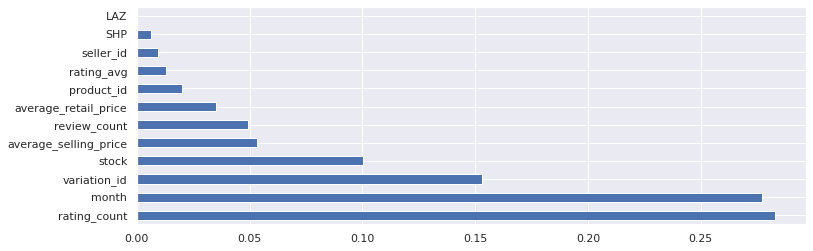

In [ ]:
# variables les plus importantes decision tree
feat_importances = pd.Series(dt_clf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(12).plot(kind='barh');

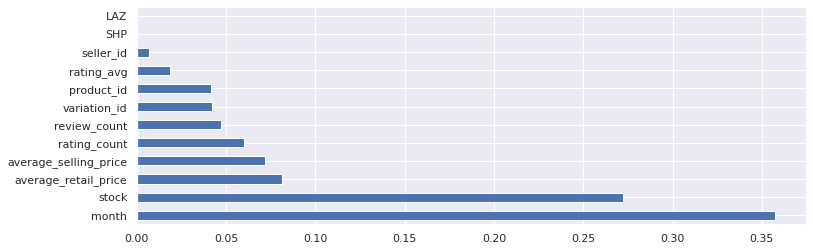

In [ ]:
# random forest feature_importances_
feat_importances = pd.Series(rf_clf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(12).plot(kind='barh');

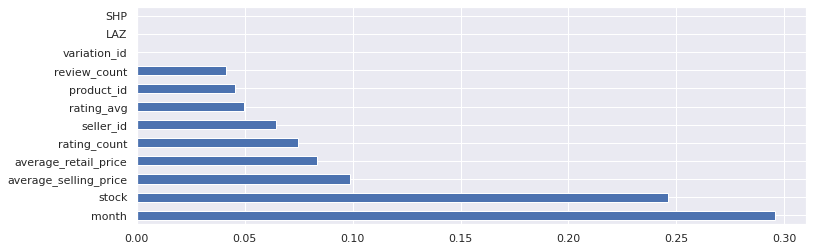

In [ ]:
# Xgbregreesor feature_importances_
feat_importances = pd.Series(xgbr.feature_importances_, index=X_train.columns)
feat_importances.nlargest(12).plot(kind='barh');

# ***interprétabilité avec SHAP***

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.3 MB/s 


In [ ]:
import shap
from IPython.display import display

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_train.columns)

In [ ]:
# prédictions random forest avec SHAP
explainer = shap.TreeExplainer(rf_clf)

shap_values = explainer.shap_values(X_test_scaled)

print('Expected Value:', explainer.expected_value)

pd.DataFrame(shap_values).head()

KeyboardInterrupt: ignored

In [ ]:
# prédictions decision tree avec SHAP
explainer = shap.TreeExplainer(dt_clf)

shap_values = explainer.shap_values(X_test_scaled)

print('Expected Value:', explainer.expected_value)

pd.DataFrame(shap_values).head()

Expected Value: [405.74928009]


,0,1,2,3,4,5,6,7,8,9,10,11
0,-26.563093,18.202984,-46.036781,-24.355205,105.484439,-601.860066,0.620369,151.302431,55.897468,-37.863603,0.025214,7.396562
1,-28.541371,-26.268741,-27.239162,-0.503967,93.111184,-402.712186,1.786764,109.967687,-3.269570,-36.837061,0.012247,13.744897
2,-27.633168,23.357784,-32.805163,-3.408923,103.472031,-596.955854,4.673588,140.691260,67.701561,-41.032205,-0.010222,-31.799968
3,-26.987177,0.801088,36.048837,-10.179291,128.482212,-413.338391,13.671367,146.033435,69.951782,-44.564776,-0.004965,-154.163401
4,-20.992389,-48.005296,20.660097,-89.129414,-105.418351,648.621855,-2.808732,-80.790869,0.741150,-396.792328,0.008968,79.156029


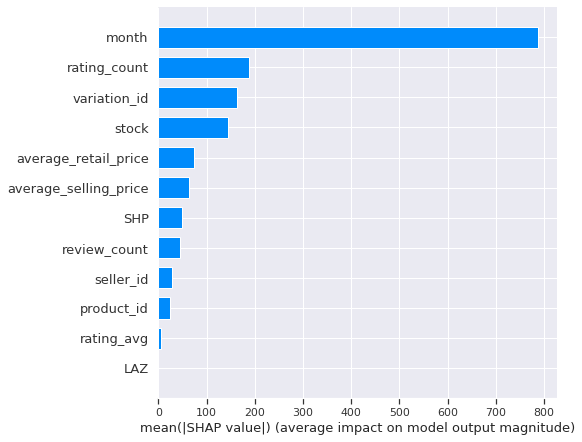

In [ ]:
# features importances random forest obtenues avec SHAP
shap.summary_plot(shap_values, X_test_scaled, plot_type="bar")

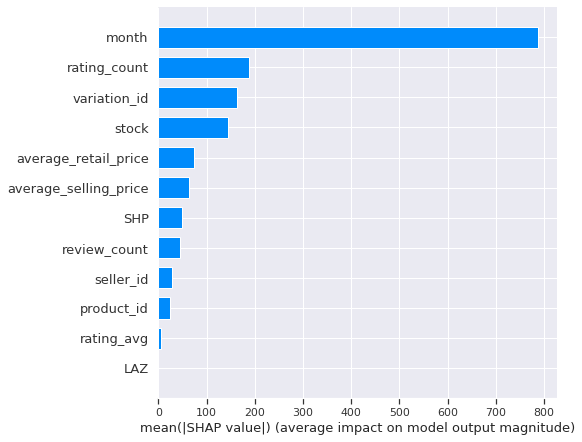

In [ ]:
# features importances decision tree obtenues avec SHAP
shap.summary_plot(shap_values, X_test_scaled, plot_type="bar")

In [ ]:
# dependance plots de différentes variables (random forest)

shap.dependence_plot("month", shap_values, X_test_scaled, interaction_index= "promotion_en_%")

ValueError: ignored

In [ ]:
shap.dependence_plot("rating_count", shap_values, X_test_scaled, interaction_index= "promotion_en_%")

ValueError: ignored

In [ ]:
shap.dependence_plot("promotion_en_%", shap_values, X_test_scaled, interaction_index= "average_selling_price")

shap.dependence_plot("rating_count", shap_values, X_test_scaled, interaction_index= "average_selling_price")
shap.dependence_plot("stock", shap_values, X_test_scaled, interaction_index= "average_selling_price")

ValueError: ignored

In [ ]:
# prédictions XGBregressor avec SHAP
explainer = shap.TreeExplainer(xgbr)

shap_values = explainer.shap_values(X_test_scaled)

print('Expected Value:', explainer.expected_value)

pd.DataFrame(shap_values).head()

Expected Value: 561.9204


,0,1,2,3,4,5,6,7,8,9,10,11
0,2.766679,-120.004768,-64.090942,-280.712402,0.0,-385.969818,-49.745422,386.853546,57.768112,-83.371399,0.0,0.0
1,1.917102,-121.837700,35.288902,-37.807659,0.0,-80.872490,-49.499313,39.685726,45.432537,-90.325829,0.0,0.0
2,11.402691,-112.897995,-277.927948,-581.717773,0.0,-368.499329,77.058380,797.418518,49.271149,-153.040695,0.0,0.0
3,12.521185,-113.885719,-352.371033,-589.782654,0.0,-167.961365,3.378188,813.471863,45.834240,-105.410942,0.0,0.0
4,1.703201,-72.624382,37.649902,-335.170624,0.0,930.045349,-50.770603,-139.061737,9.843468,-498.603638,0.0,0.0


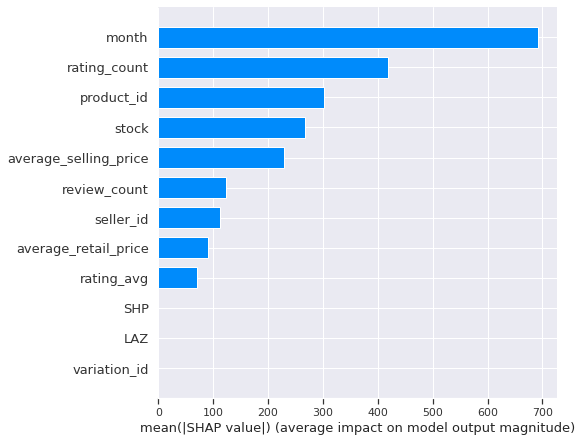

In [ ]:
# features importances xgbregreesor with SHAP
shap.summary_plot(shap_values, X_test_scaled, plot_type="bar")

In [ ]:
shap.dependence_plot("rating_count", shap_values, X_test_scaled, interaction_index= "promotion_en_%")

ValueError: ignored

# ***interprétabilité avec Skater***

In [ ]:
pip install git+https://github.com/oracle/Skater.git

In [ ]:
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel

In [ ]:
#feature importance with skater
features_list = list(X.columns)
interpreter = Interpretation(training_data=X_test, training_labels=y_test, feature_names=features_list)
im_model = InMemoryModel(xgbr.predict_proba, examples=X_train, target_names=['Low Quality', 'Hight Quality'])
plots = interpreter.feature_importance.plot_feature_importance(im_model, ascending=True, progressbar=False)

USING eli



> Bloc en retrait



In [ ]:
 pip install eli5

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance
eli5.show_weights(xgbr.get_booster())

In [ ]:
#eli permutation importance
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="binary:logistic", n_estimators=20, random_state=42, eval_metric=["auc", "error", "error@0.6"])

In [ ]:
xgb_model.fit(X_train_scaled, y_train)

In [ ]:
feat_permut = PermutationImportance(xgb_model, random_state=33).fit(X_train_scaled, y_train)
eli5.show_weights(feat_permut, feature_names = features_list)

# **Prévisions des ventes**

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving data_pour_previsions.csv to data_pour_previsions.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import statsmodels.api as sm

In [ ]:
# création dataframe pour les prévisions

data = pd.read_csv('private_data.csv')
olonnes = ['date', 'quantity']
df = data[colonnes]

from datetime import datetime
df['date'] = pd.to_datetime(df['date'])

df['year'] = df['date'].dt.year
df = df[df['year'] == 2020]
df = df.drop('year', axis = 1)

df = df.groupby('date').sum()


df.to_csv('data_pour_previsions.csv')

In [ ]:
# chargement du fichier créé ci-dessus
df = pd.read_csv('data_pour_previsions.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.set_index(df['date'])
df = df.drop('date', axis = 1)
df.head()

,quantity
date,
2020-01-01,2385
2020-01-02,3625
2020-01-03,10917
2020-01-04,3873
2020-01-05,4055


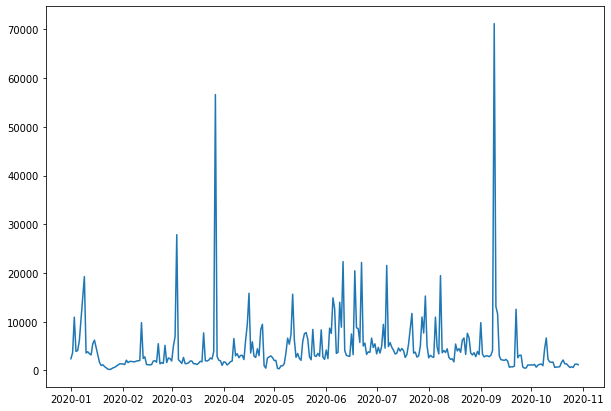

In [ ]:
# Dataviz
plt.figure(figsize = (10, 7))
plt.plot(df);

In [ ]:
# pour une bonne cohérence au niveau de la prévision avec une périodicité correctes: décision de supprimer les 13 premières lignes de df car il manque des jours
df = df.iloc[13:]

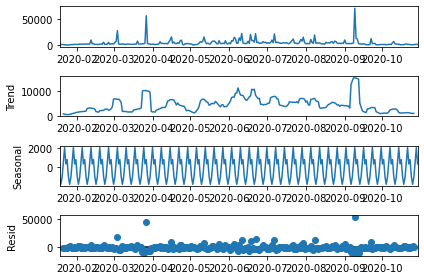

In [ ]:
decomposition = sm.tsa.seasonal_decompose(df)
decomposition.plot()
plt.show();

In [ ]:
# vérification si on a des données stationaire 
from statsmodels.tsa.stattools import adfuller
_, p_value, _, _, _, _ = adfuller(df)
p_value
# la p_value est bien inférieure à 5%, ainsi on peut considérer notre série comme stationnaire

6.611993294235327e-17

In [ ]:
# séparation des données en train et test
train = df.iloc[:240]
test = df.iloc[240:]

In [ ]:
# évaluation des prévisions avec SARIMAX
model = sm.tsa.SARIMAX(train, order=(0,0,2), seasonal_order=(0,0,2,12))
result = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [ ]:
# prédiction
start = len(train)
end = len(df) - 1
pred = result.predict(start = start, end = end, typ = 'levels')

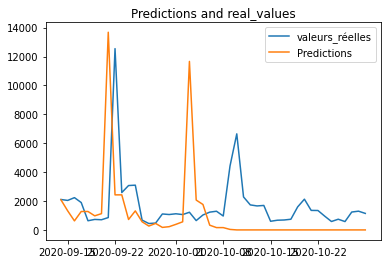

In [ ]:
# représentation graphique des valeurs prédites et celles réelles:

import datetime

plt.plot(test, label = 'valeurs_réelles')
plt.plot(pred, label = 'Predictions')

plt.title('Predictions and real_values')
plt.legend()
plt.show();

In [ ]:
# prévisions sur les mois futurs

futur_date = pd.date_range(start = '2020-09-01', end = '2020-12-31')
prev = result.predict(start = len(train) - 13, end = len(df)+62)
prev.index = futur_date

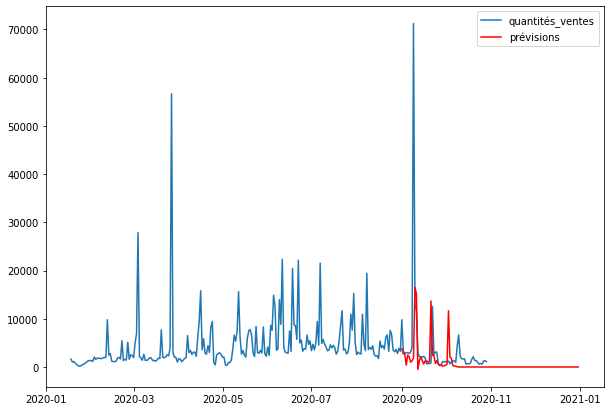

In [ ]:
plt.figure(figsize = (10, 7))
plt.plot(df, label = 'quantités_ventes')
plt.plot(prev, label = 'prévisions', color = 'red')

plt.legend()
plt.show();